# Play Store app Analysis

# INTRODUCTION:

The objective of this project is to deliver insights to understand customer demands better and thus help developers to popularize the product. The dataset is chosen from Kaggle. It is of 10k Play Store apps for analyzing the Android market. It consists of in total of 10841 rows and 13 columns.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('googleplaystore.csv')

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000+,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000+,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000+,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000+,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000+,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [4]:
data.shape

(10840, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [6]:
data.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


In [7]:
data.loc[10472]

App               osmino Wi-Fi: free WiFi
Category                            TOOLS
Rating                                4.2
Reviews                            134203
Size                                 4.1M
Installs                        10000000+
Type                                 Free
Price                                   0
Content Rating                   Everyone
Genres                              Tools
Last Updated                     7-Aug-18
Current Ver                       6.06.14
Android Ver                    4.4 and up
Name: 10472, dtype: object

removing the 10782 row as it has miss matched value in category 

In [8]:
data.drop(data.index[10782], inplace= True)

Converting the intsall and price column to numerics

In [9]:
data['Installs']=data['Installs'].apply(lambda x: x.replace('+',"") if '+' in str(x) else (x))

In [10]:
data['Installs'] = data['Installs'].apply(lambda x: int(x))

In [11]:
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9365 non-null   float64
 3   Reviews         10839 non-null  int64  
 4   Size            10839 non-null  object 
 5   Installs        10839 non-null  int64  
 6   Type            10838 non-null  object 
 7   Price           10039 non-null  float64
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


# Checking if the dataframe contains any dupliacte value in app

In [13]:
data['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
U-Report                                             1
U of I Community Credit Union                        1
Waiting For U Launcher Theme                         1
Wi u Emulator                                        1
iHoroscope - 2018 Daily Horoscope & Astrology        1
Name: App, Length: 9658, dtype: int64

as from the above mentioned data, some of the apps are having multiple rows. so now lets checks out if there data is identical or not

In [14]:
data[data['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,31-Jul-18,2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,31-Jul-18,2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,31-Jul-18,2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,31-Jul-18,2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,31-Jul-18,2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,31-Jul-18,2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,31-Jul-18,2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,31-Jul-18,2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,31-Jul-18,2.347.225742,4.1 and up


As we can see from the above dataframe, ROBLOX app is having identical rows with difference in number of reviews.

# dropping the dupicate 

In [15]:
data.drop_duplicates(inplace= True)

In [16]:
data.shape

(10356, 13)

# converting the review column to numeric


In [17]:
data['Reviews'] = data['Reviews'].astype(str).str.replace('M', 'e6').apply(pd.to_numeric, errors='coerce')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10356 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10356 non-null  object 
 1   Category        10356 non-null  object 
 2   Rating          8891 non-null   float64
 3   Reviews         10356 non-null  int64  
 4   Size            10356 non-null  object 
 5   Installs        10356 non-null  int64  
 6   Type            10355 non-null  object 
 7   Price           9591 non-null   float64
 8   Content Rating  10356 non-null  object 
 9   Genres          10356 non-null  object 
 10  Last Updated    10356 non-null  object 
 11  Current Ver     10348 non-null  object 
 12  Android Ver     10354 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB


# what are the top 20 apps present in the google play store as per thier genres?

<Axes: >

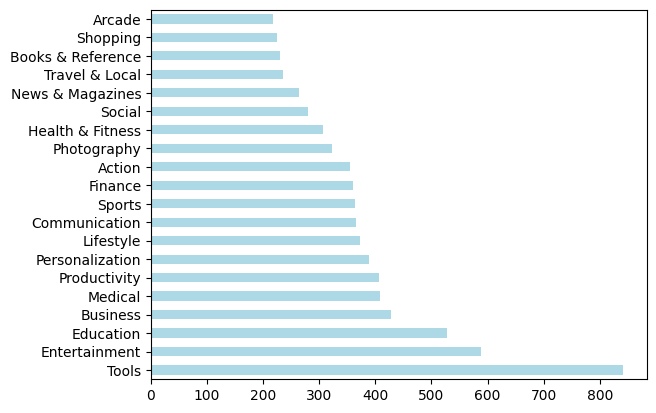

In [19]:
top_20 = data['Genres'].value_counts().head(20)
top_20.plot(kind= 'barh', color='lightblue')

In [20]:
top_genres = data.Genres.value_counts().head(10)
top_genres

Tools              842
Entertainment      588
Education          527
Business           427
Medical            408
Productivity       407
Personalization    388
Lifestyle          372
Communication      366
Sports             364
Name: Genres, dtype: int64

<Axes: >

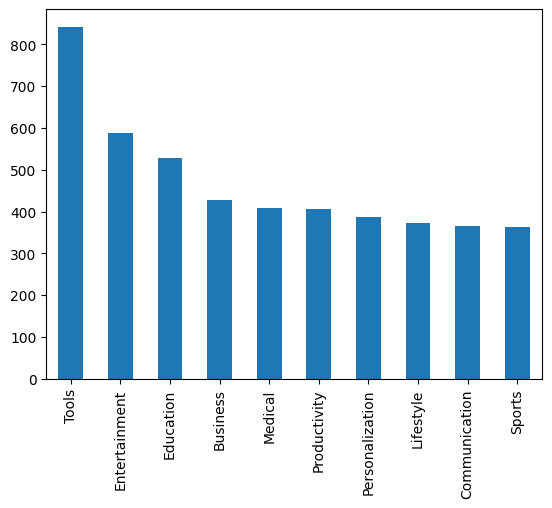

In [21]:
top_genres.plot(kind='bar')

In [22]:
data['log_Installs'] = np.log10(data['Installs'])

C:\Users\bhargavi\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,4.00000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,5.69897
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,6.69897
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,7.69897
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,5.00000


In [24]:
data['Installs'].min(),data['Installs'].max()

(0, 1000000000)

# Genre that are getting install at the most 

In [25]:
top10  = pd.pivot_table(data = data, index= 'Genres', values=['Installs']).sort_values(by=['Installs'],ascending = False).head(10)
top10

,Installs
Genres,
Adventure;Action & Adventure,6.970385e+07
Communication,6.598983e+07
Casual,4.535513e+07
Social,4.469239e+07
Arcade,4.457399e+07
Video Players & Editors,3.587863e+07
Puzzle;Action & Adventure,3.102000e+07
Productivity,3.062185e+07
Photography,3.019021e+07


<Axes: xlabel='Genres'>

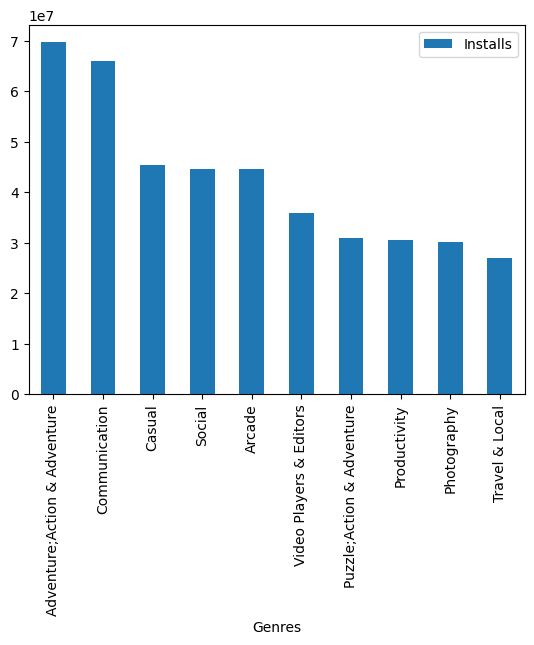

In [26]:
top10.plot(kind='bar')

<Axes: xlabel='Genres'>

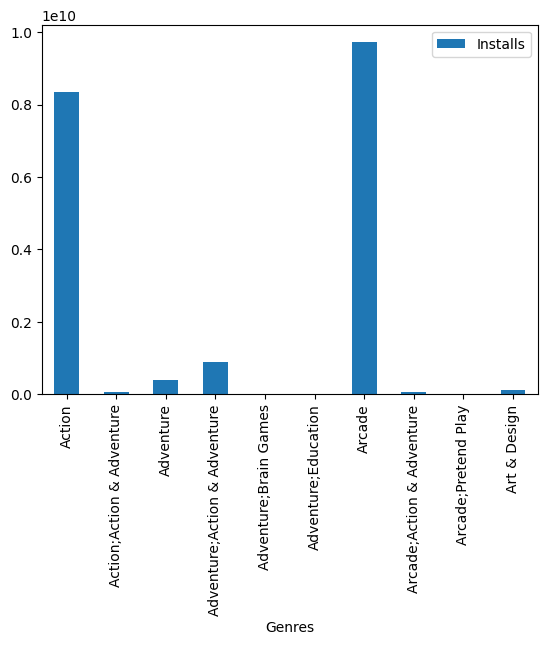

In [27]:
top20_install = data.groupby(['Genres'])[['Installs']].sum()
top20_install.head(10).plot(kind='bar')

# by category 

In [28]:
top_category = data['Category'].value_counts().head(10)
top_category

FAMILY             1943
GAME               1120
TOOLS               843
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     388
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: Category, dtype: int64

<Axes: >

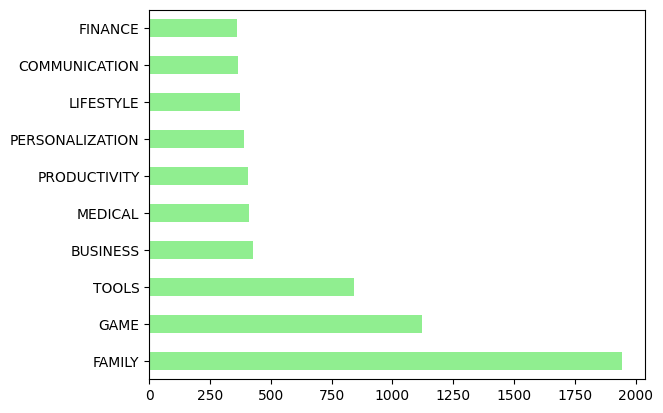

In [29]:
top_category.plot(kind ='barh', color='lightgreen')

#  categories that are most installed 

In [30]:
top10  = pd.pivot_table(data = data, index= 'Category', values=['Installs']).sort_values(by=['Installs'],ascending = False).head(10)
top10

,Installs
Category,
COMMUNICATION,6.598983e+07
SOCIAL,4.469239e+07
VIDEO_PLAYERS,3.555430e+07
PRODUCTIVITY,3.062185e+07
PHOTOGRAPHY,3.019021e+07
GAME,2.816426e+07
TRAVEL_AND_LOCAL,2.684341e+07
ENTERTAINMENT,2.212306e+07
NEWS_AND_MAGAZINES,2.042886e+07


<Axes: xlabel='Category'>

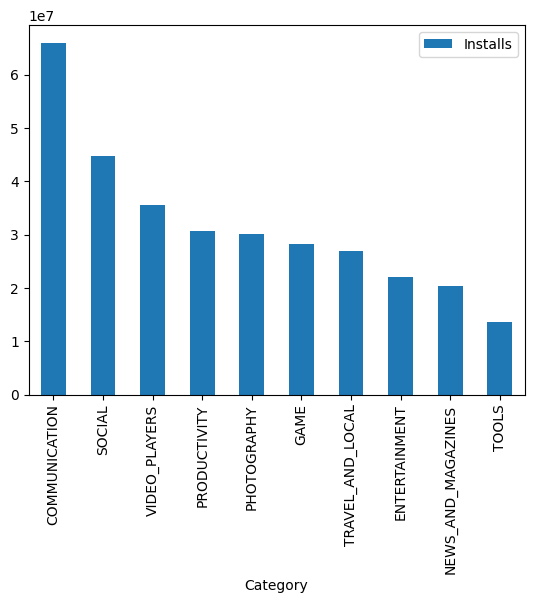

In [31]:
top10.plot(kind='bar')

# average rating

In [32]:
data['Rating'].describe()

count    8891.000000
mean        4.187875
std         0.522406
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [33]:
rating = pd.pivot_table(data = data, index= 'Genres', values=['Rating']).sort_values(by=['Rating'],ascending = False).head(10)
rating

,Rating
Genres,
Comics;Creativity,4.800000
Board;Pretend Play,4.800000
Health & Fitness;Education,4.700000
Puzzle;Education,4.600000
Adventure;Brain Games,4.600000
Strategy;Action & Adventure,4.600000
Entertainment;Creativity,4.533333
Music;Music & Video,4.533333
Tools;Education,4.500000


<Axes: ylabel='Genres'>

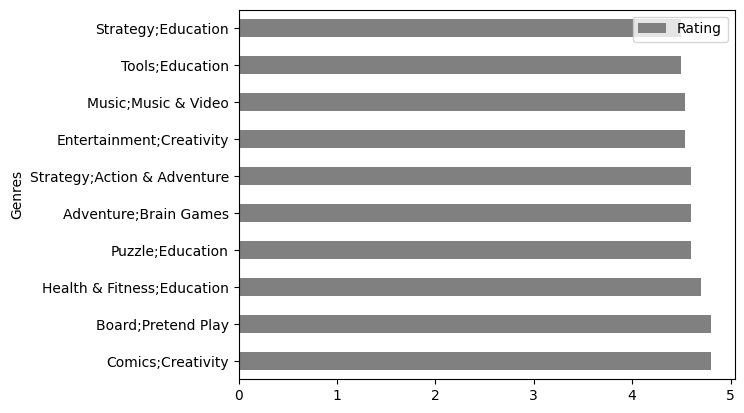

In [34]:
rating.plot(kind='barh', color ='grey')

C:\Users\bhargavi\AppData\Local\Temp\ipykernel_9348\2900398203.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rating, color='red', shade=True)


<Axes: ylabel='Density'>

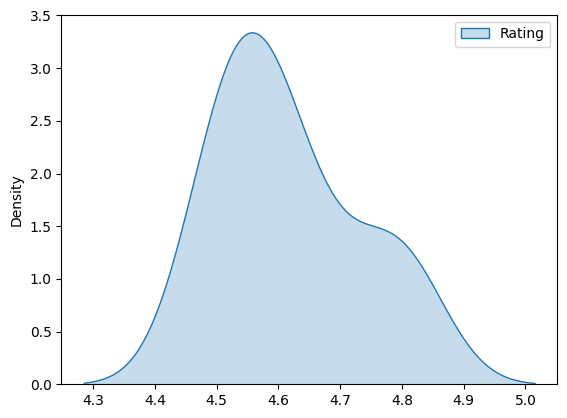

In [35]:
sns.kdeplot(rating, color='red', shade=True)

In [36]:
what are the application in each category differentiated by their type?

In [37]:
app_count = data.groupby(['Category','Type'])[['App']].count().reset_index()
app_count


,Category,Type,App
0,ART_AND_DESIGN,Free,62
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,82
3,AUTO_AND_VEHICLES,Paid,3
4,BEAUTY,Free,53
...,...,...,...
58,TRAVEL_AND_LOCAL,Paid,12
59,VIDEO_PLAYERS,Free,171
60,VIDEO_PLAYERS,Paid,4
61,WEATHER,Free,74


In [38]:
df_app_count = app_count.pivot('Category', 'Type', 'App').fillna(0).reset_index()
df_app_count

C:\Users\bhargavi\AppData\Local\Temp\ipykernel_9348\696278198.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_app_count = app_count.pivot('Category', 'Type', 'App').fillna(0).reset_index()


Type,Category,Free,Paid
0,ART_AND_DESIGN,62.0,3.0
1,AUTO_AND_VEHICLES,82.0,3.0
2,BEAUTY,53.0,0.0
3,BOOKS_AND_REFERENCE,202.0,28.0
4,BUSINESS,415.0,12.0
5,COMICS,60.0,0.0
6,COMMUNICATION,339.0,27.0
7,DATING,189.0,7.0
8,EDUCATION,126.0,4.0
9,ENTERTAINMENT,109.0,2.0


<Axes: xlabel='Category'>

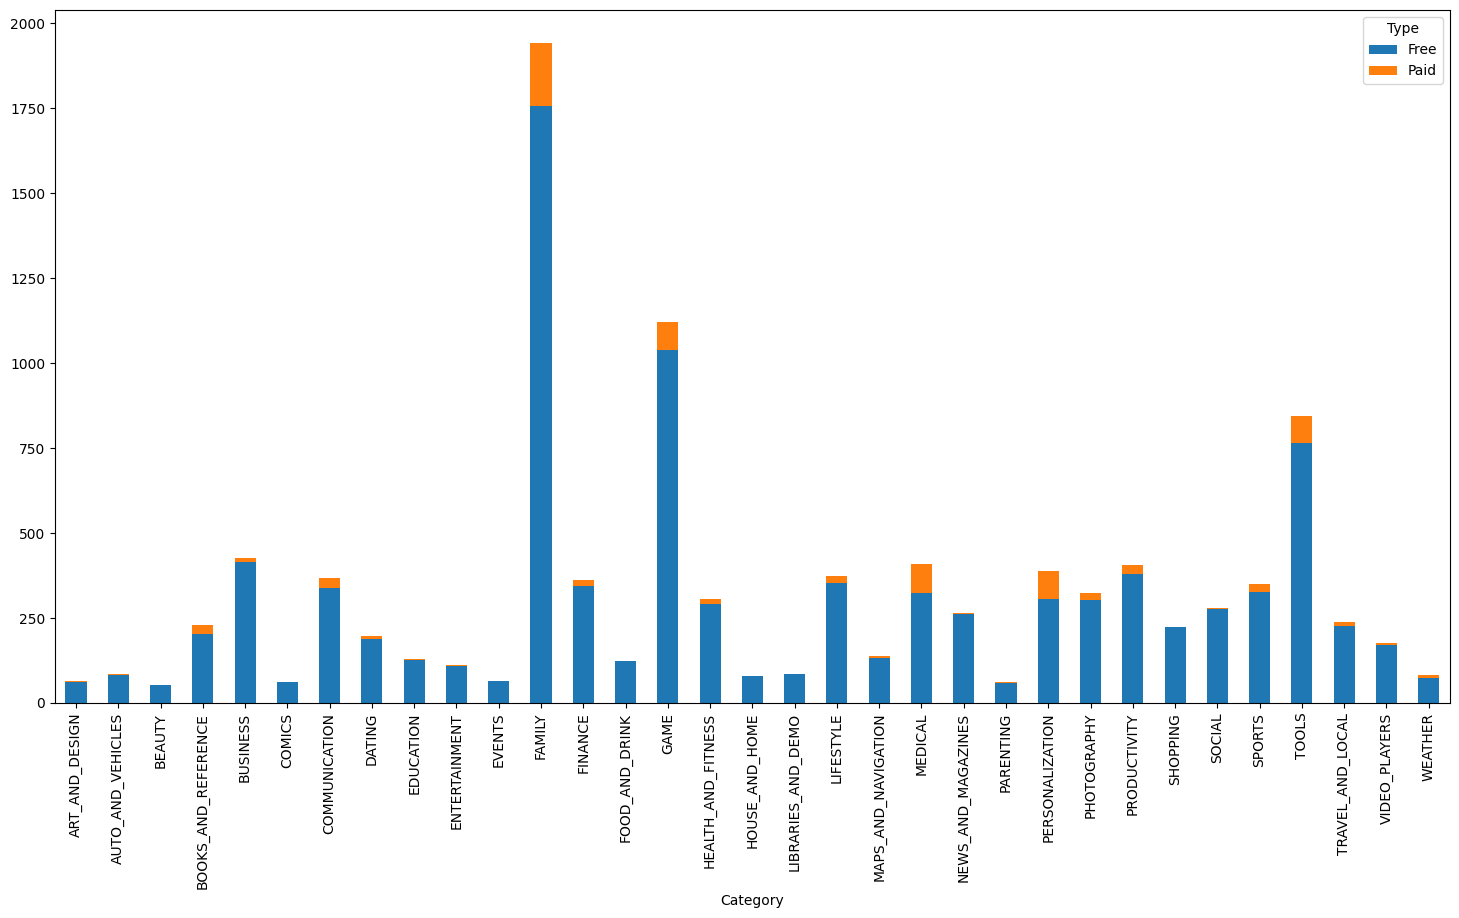

In [39]:
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9))

It looks like certain app categories have more free apps available for download than others. In our dataset, the majority of apps in Family, Food & Drink and games categories were free to install. and aslo family, medical and tools had the biggest number of paid app download 

# how many app where install according to its type

In [40]:
type_install = data.groupby(['Category','Type'])[['Installs']].sum().reset_index()
type_install

,Category,Type,Installs
0,ART_AND_DESIGN,Free,124322100
1,ART_AND_DESIGN,Paid,16000
2,AUTO_AND_VEHICLES,Free,53080061
3,AUTO_AND_VEHICLES,Paid,50150
4,BEAUTY,Free,27197050
...,...,...,...
58,TRAVEL_AND_LOCAL,Paid,183060
59,VIDEO_PLAYERS,Free,6221931720
60,VIDEO_PLAYERS,Paid,71000
61,WEATHER,Free,425288520


In [41]:
type_install['log_Installs'] = np.log10(type_install['Installs'])
type_install

,Category,Type,Installs,log_Installs
0,ART_AND_DESIGN,Free,124322100,8.094548
1,ART_AND_DESIGN,Paid,16000,4.204120
2,AUTO_AND_VEHICLES,Free,53080061,7.724931
3,AUTO_AND_VEHICLES,Paid,50150,4.700271
4,BEAUTY,Free,27197050,7.434522
...,...,...,...,...
58,TRAVEL_AND_LOCAL,Paid,183060,5.262593
59,VIDEO_PLAYERS,Free,6221931720,9.793925
60,VIDEO_PLAYERS,Paid,71000,4.851258
61,WEATHER,Free,425288520,8.628684


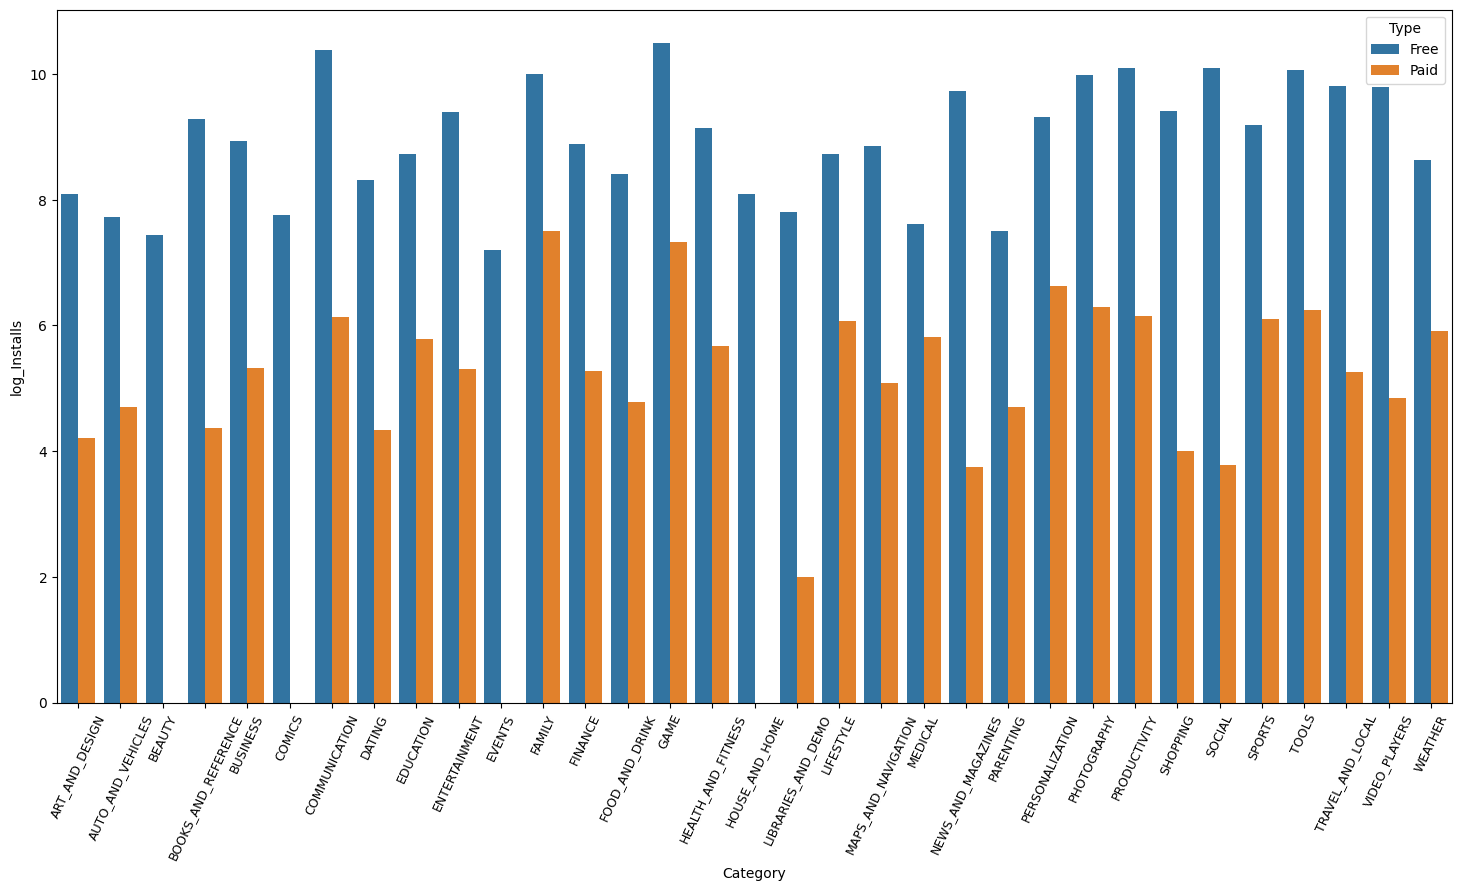

In [42]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
sns.barplot(x=type_install['Category'],y=type_install['log_Installs'], hue='Type', data= type_install)
plt.show()

It can be concludd that the number of free applications installed by the user are high when compared with the paid ones

# how does size impact the number of installs of any application

In [43]:
data.Size.value_counts()

Varies with device    1526
11M                    188
13M                    186
12M                    186
14M                    182
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 461, dtype: int64

In [44]:
# Converting KB to MB 
data['Size'] = data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(x))

In [45]:
data.Size.value_counts()


11.000    188
13.000    186
12.000    186
14.000    182
15.000    174
         ... 
0.430       1
0.429       1
0.200       1
0.460       1
0.619       1
Name: Size, Length: 459, dtype: int64

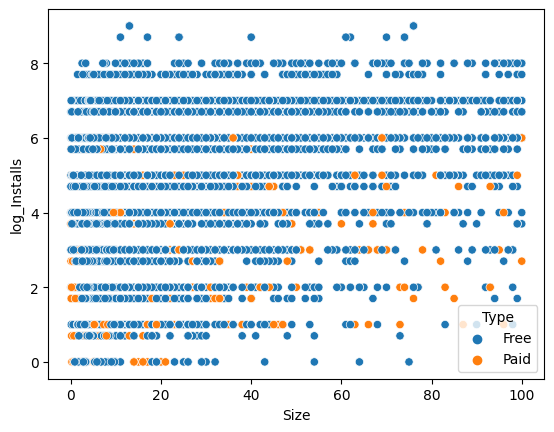

In [46]:

sns.scatterplot(x='Size', y='log_Installs', hue='Type', data=data)
plt.show()

It is clear from the above mentioned plot that size may impact the number of installations. Bulky applications are less installed by the user.

# histogram for log installs

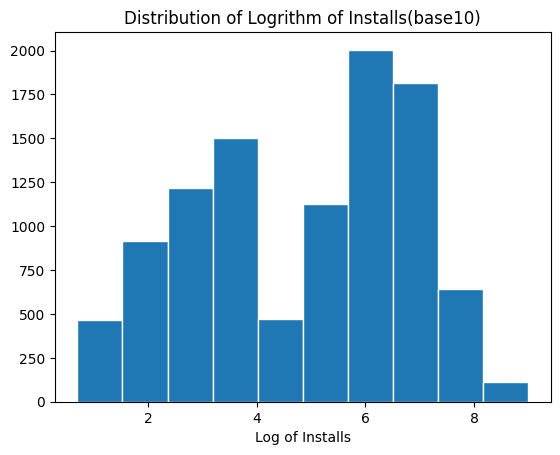

In [48]:
data = data[data['log_Installs'] > 0]
data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=['log_Installs'])

plt.xlabel("Log of Installs")
plt.title("Distribution of Logrithm of Installs(base10)")
plt.hist(data['log_Installs'],edgecolor='white')
plt.show()

# histogram for size

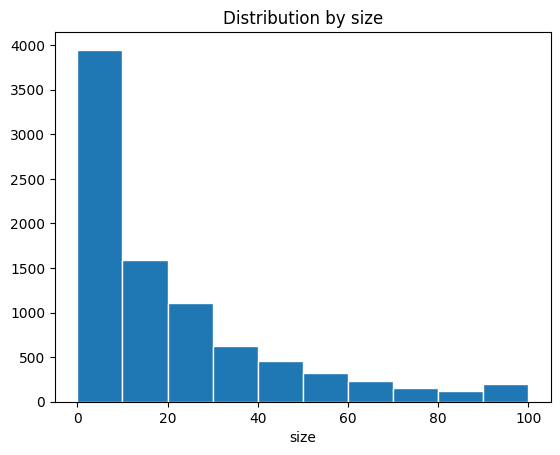

In [49]:
plt.xlabel('size')
plt.title('Distribution by size')
plt.hist(data['Size'], edgecolor= 'white')
plt.show()

 From the above histogram, it can be concluded that maximum number of applications present in the dataset are of small size.